In [ ]:
import sys; sys.path.insert(0,'..')
from hashstash import *
logger.setLevel(logging.INFO)
from hashstash.profilers.engine_profiler import *
import pandas as pd


In [8]:
df=pd.concat([
    HashStashProfiler.profile_engines(num_procs=[i], iterations=100).reset_index()
    for i in [1,2,4,8]
])

Profiling 14 stashes: 100%|██████████| 14/14 [00:00<00:00, 185.42it/s]


In [9]:
df['Num Proc'].value_counts()

Num Proc
1    9000
2    7800
4    7800
8    7200
Name: count, dtype: int64

In [22]:
# HashStashProfiler.plot_engines(
#     # df=df[(df['Data Type'] == 'Average') & (df['Num Proc'] != 4) & (df['Engine'] != 'sqlite')],
#     df=df[(df['Data Type'] == 'Average') & (df['Engine'] != 'sqlite') & (df['Operation'].isin(['Set', 'Get']))],
#     # facet_wrap='Num Proc',
#     facet_grid_by='Operation ~ Num Proc',
# )
import plotnine as p9

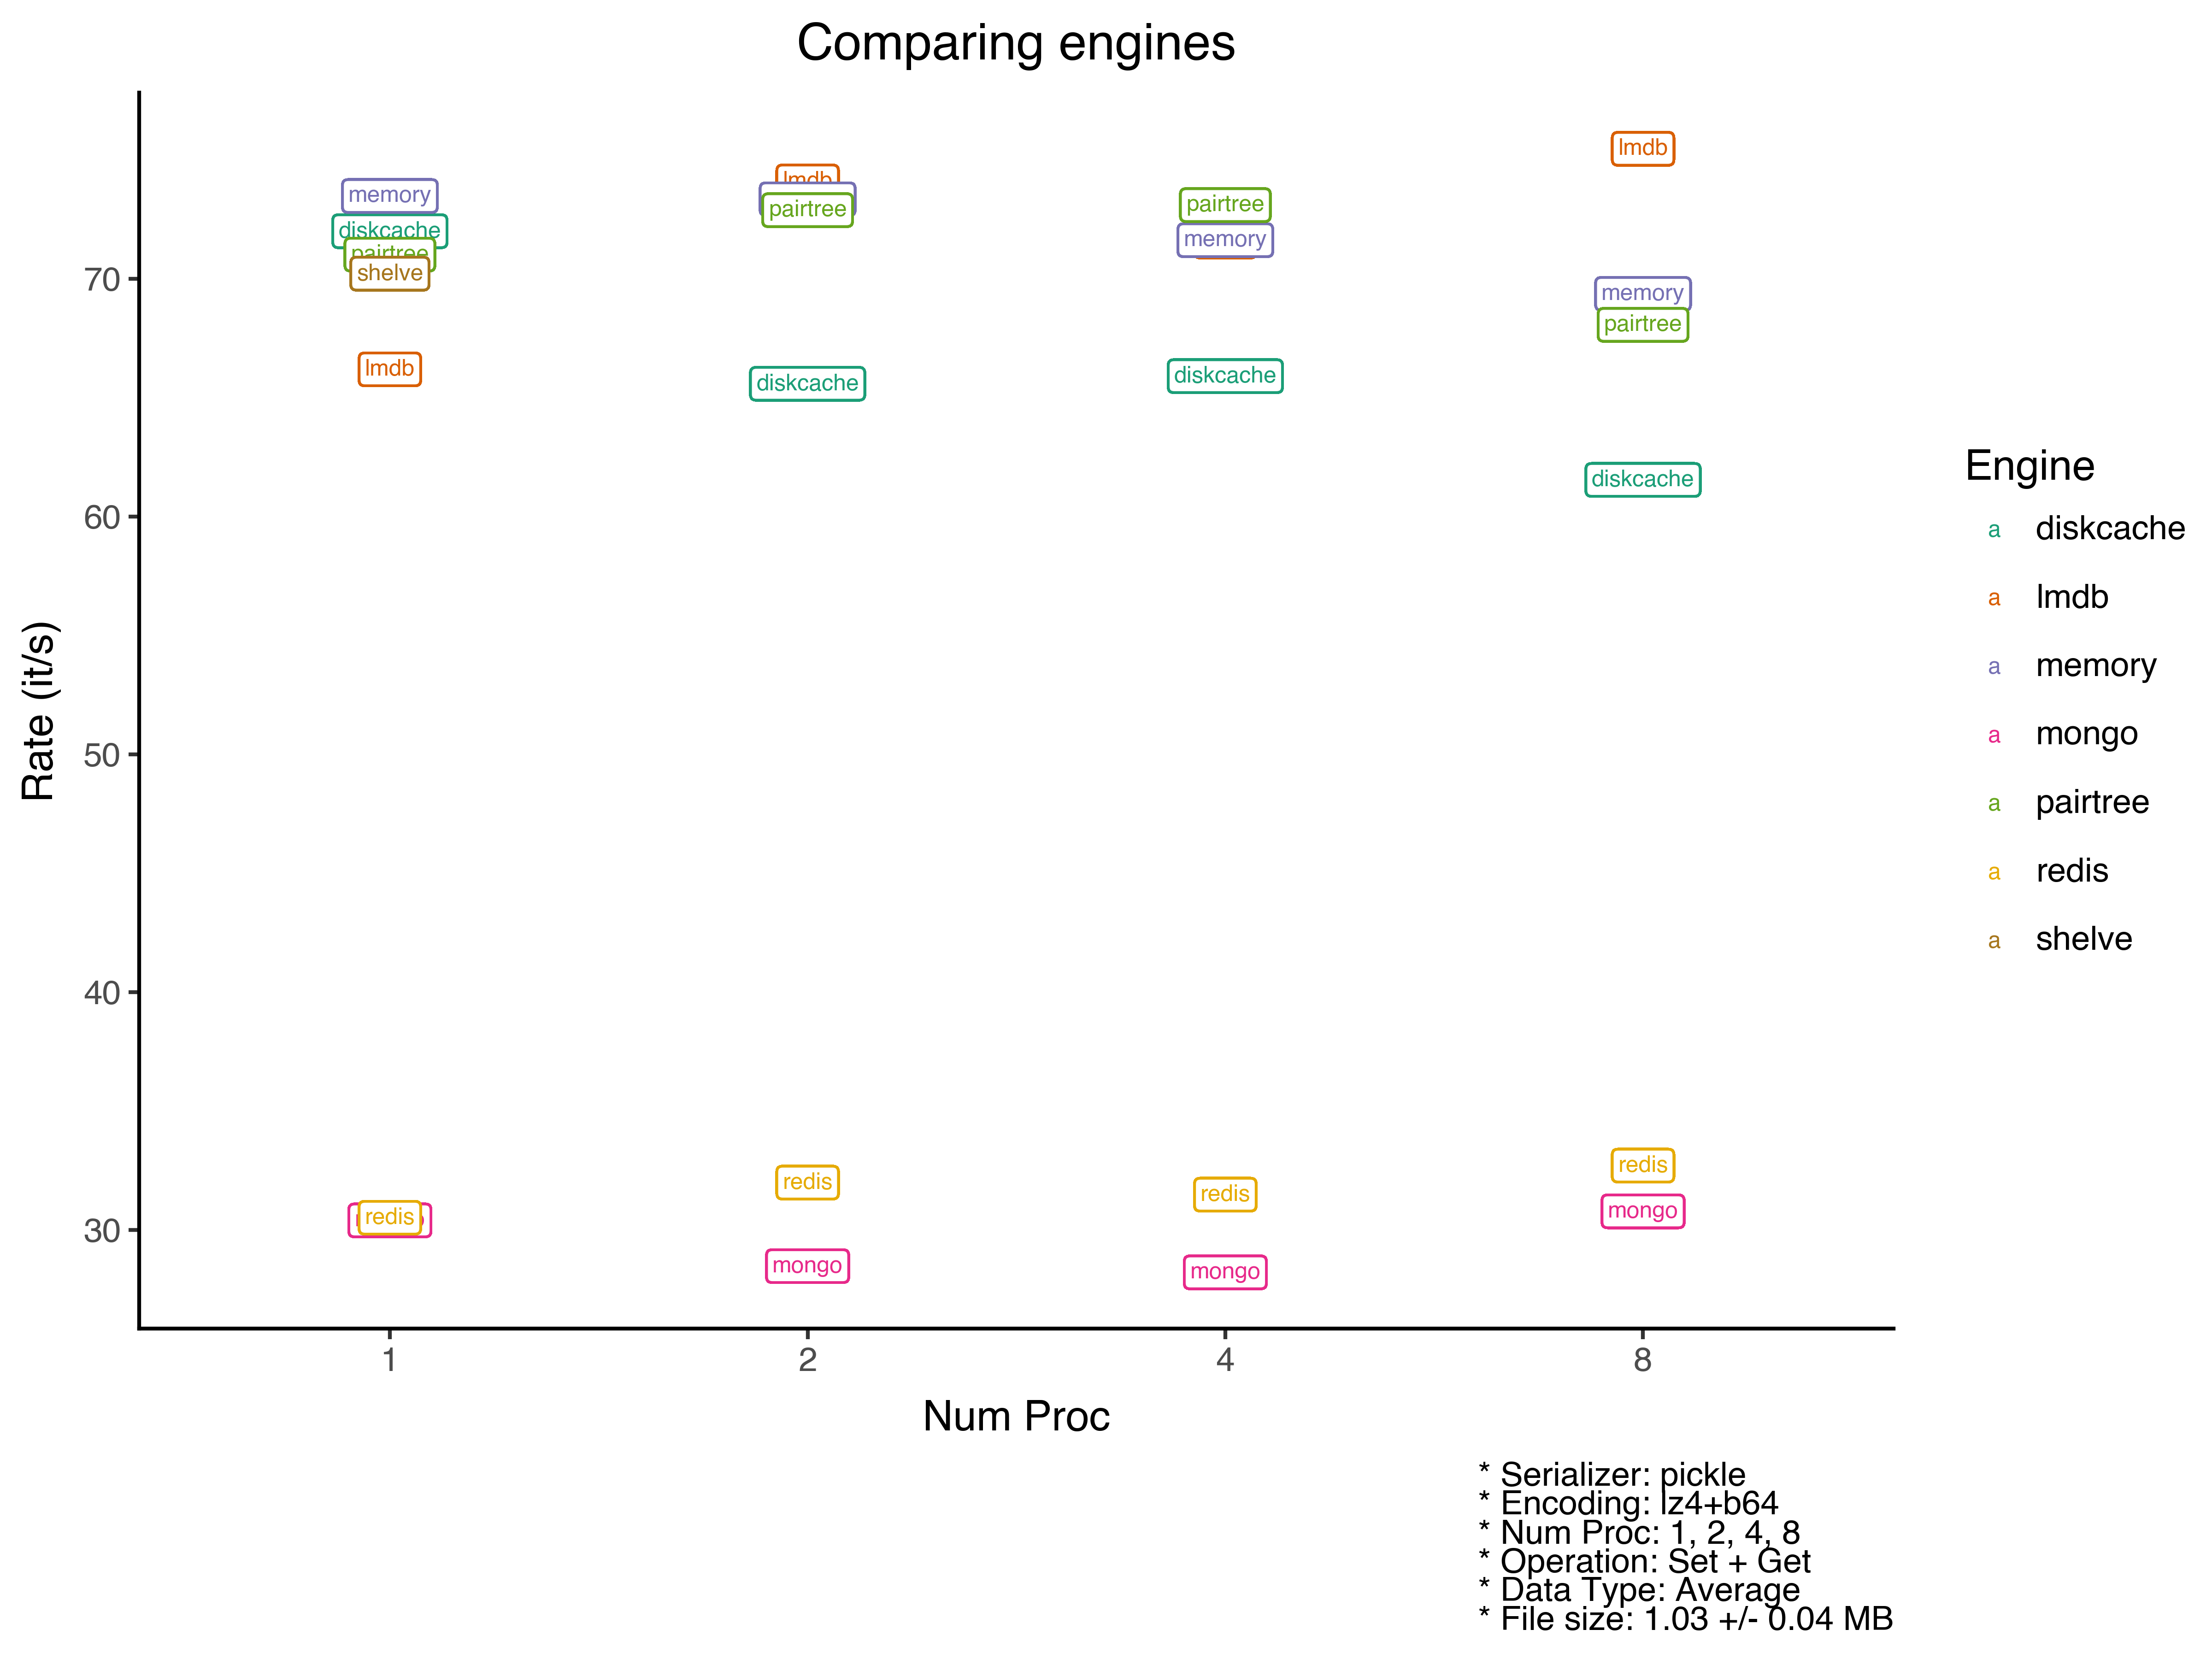

In [29]:
HashStashProfiler.plot_engines(
    # df=df[(df['Data Type'] == 'Average') & (df['Num Proc'] != 4) & (df['Engine'] != 'sqlite')],
    df=df[(df['Data Type'] == 'Average') & (df['Engine'] != 'sqlite') & (df['Operation'].isin(['Set + Get']))],
    # facet_wrap='Num Proc',
    facet_grid_by=None,
    x='Num Proc',
    y='Rate (it/s)',
    smooth=False
)

In [ ]:
HashStashProfiler.plot_serializers()

In [ ]:
HashStashProfiler.plot_encodings()